<a href="https://colab.research.google.com/github/DressPD/electric_motion_forecast/blob/main/Schneider_Electric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Schneider Electric Challenge**
---
*    Data Analytics for Application class
*    WiSe 22/23 - TUM
*    Prepared and developed by Aris Dressino, ...

In [1]:
# basic libraries needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
import tensorflow as tf
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
# colab package for file reading
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading files from Google Drive
data_hor_disc = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/DiscreteMotion_Data_Horizontalsetup.xlsx", sheet_name = "Sheet1")
data_hor_cont = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/ContinuousMotion_Data_Horizontalsetup.xlsx", sheet_name = "Sheet1")
data_ver_disc = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/DiscreteMotion_Data_Verticalsetup.xlsx", sheet_name = "Tabelle1")
data_ver_cont = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/ContinuousMotion_Data_Verticalsetup.xlsx", sheet_name = "Tabelle1")
# use this in local environment
# data_hor_disc = pd.read_excel("path/", sheet_name="name")

## **exploratory data analysis and visualization**
---

1.   Summary statistics and head
2.   Visualization of continuous and discrete patterns per selected rotations per minute (RPM)
3. ... add something guys



In [4]:
# header of discrete horizontal data
data_hor_disc.head(5)

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
0,0.846,0.044,0.014,0.255,4.009,0.516,5.616,7.860,9.240,9.974999,10.981999,6.578000,12.059999,7.950,12.599,9.990001,9.555000,19.096001,13.938000,0.202
1,0.846,0.044,0.167,0.255,4.009,0.516,5.616,7.860,9.240,9.974999,10.981999,6.578000,12.059999,7.950,12.599,9.990001,9.555000,19.096001,13.938000,0.202
2,0.846,0.044,0.167,0.255,4.009,5.676,5.400,6.930,9.240,9.974999,9.728000,6.578000,11.834999,7.830,12.599,9.990001,10.465000,13.454000,11.039999,0.564
3,0.774,0.147,0.167,4.080,4.199,5.676,5.400,6.930,7.854,8.014999,9.728000,6.578000,11.834999,7.830,7.267,9.287000,10.465000,13.454000,11.039999,0.564
4,0.774,0.147,2.171,4.080,4.199,5.676,5.400,6.468,7.854,8.014999,9.472000,10.372999,11.834999,12.267,7.267,9.287000,15.548001,13.454000,11.280000,10.434


In [5]:
# descriptive statistics of discrete table
data_hor_disc.describe()
# as expected, we register increasing mean and standard deviation along with increased RPM

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,0.843142,1.249023,1.604354,1.951205,2.206332,2.493221,2.730921,2.848026,3.118614,3.295054,3.453644,3.577217,3.732571,3.902852,3.908951,4.052579,4.156900,4.182729,4.218840,4.217175
std,0.253721,0.579047,0.920542,1.298846,1.663406,2.058099,2.446147,2.785256,3.201309,3.574365,3.955490,4.300227,4.628946,5.014324,5.244952,5.600147,5.836061,5.949107,6.142617,6.150047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.834000,1.332000,0.531000,0.294000,0.264000,0.265500,0.264000,0.244000,0.258000,0.264000,0.264000,0.238000,0.234000,0.256000,0.243000,0.255000,0.273000,0.256000,0.255000,0.270000
50%,0.900000,1.458000,2.040000,2.625000,3.204000,3.738000,2.873000,1.220000,0.828000,0.735000,0.606000,0.516000,0.458000,0.417000,0.486000,0.434500,0.426000,0.405000,0.417000,0.447000
75%,0.960000,1.575000,2.210000,2.896000,3.553000,4.242000,4.950000,5.655000,6.498750,7.310000,8.103001,8.639999,8.649000,8.613000,7.670001,7.525000,7.524000,7.560000,7.232000,7.175000
max,1.316000,2.360000,3.528000,5.100000,6.380000,7.608000,9.099999,9.641000,10.642000,11.375999,12.558001,13.631000,14.899000,16.224001,17.237999,19.139999,20.235001,22.019999,23.808001,23.487999


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Watts consumed per RPM in discrete motion')]

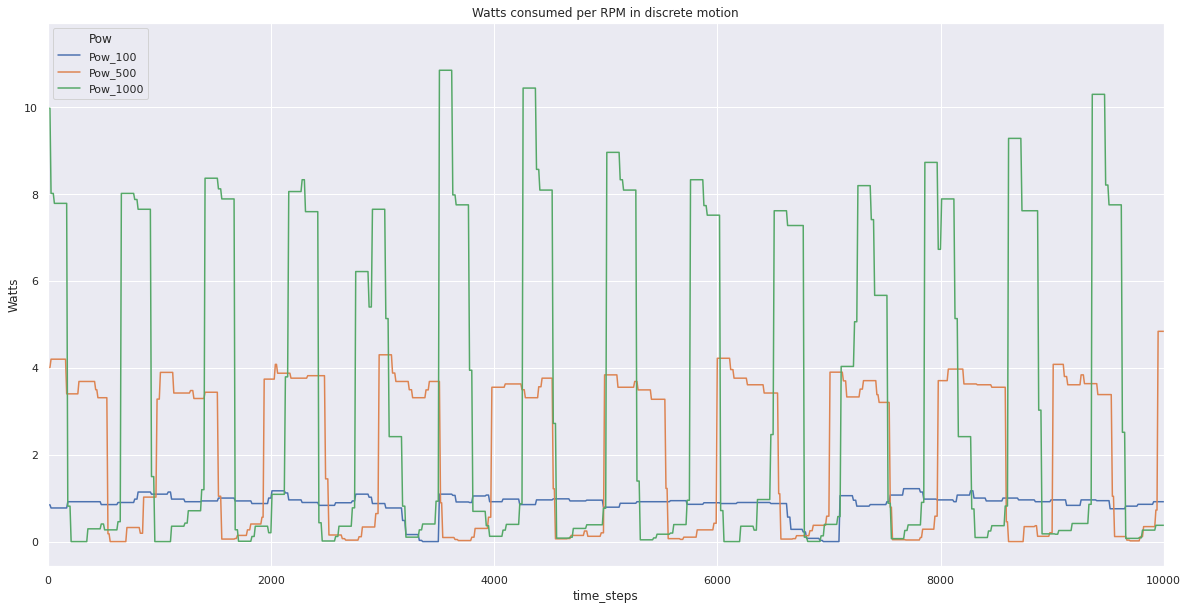

In [6]:
#add timesteps in ms for discrete tables
data_hor_disc['time_steps'] = range(0, 10*len(data_hor_disc), 10)
#data_hor_disc.head(10)
#plot melted table for discrete values
reference_pow=["Pow_100","Pow_500","Pow_1000"]
line_hor_disc = sns.lineplot("time_steps", "Watts", hue="Pow", hue_order=reference_pow,
             data=data_hor_disc.melt("time_steps", var_name="Pow", value_name="Watts"))
line_hor_disc.set_xlim(0,10000)
line_hor_disc.set(title='Watts consumed per RPM in discrete motion')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Watts consumed per RPM in continuous motion')]

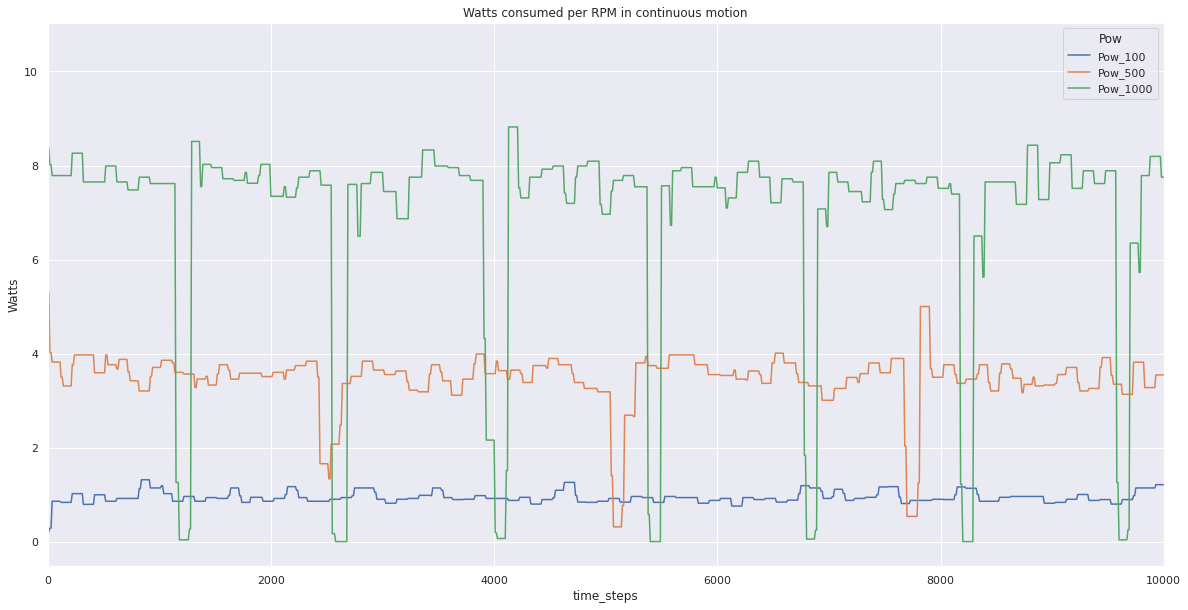

In [7]:
#add timesteps in ms to continuous table
data_hor_cont['time_steps'] = range(0, 10*len(data_hor_cont), 10)
#data_hor_cont.head(10)
#plot melted table for continuous values
reference_pow=["Pow_100","Pow_500","Pow_1000"]
line_hor_cont = sns.lineplot("time_steps", "Watts", hue="Pow", hue_order=reference_pow,
             data=data_hor_cont.melt("time_steps", var_name="Pow", value_name="Watts"))
line_hor_cont.set_xlim(0,10000)
line_hor_cont.set(title='Watts consumed per RPM in continuous motion')

In [8]:
#to be deleted
#sns.lineplot(data = data_hor_disc, x = data_hor_disc.index, y="Pow_100").set(title = "Power Consumption Horizontal Discrete")

In [9]:
#to be deleted
#sns.lineplot(data = data_hor_cont, x = data_hor_cont.index, y = "Pow_100").set(title = "Power Consumption Horizontal Continuous")

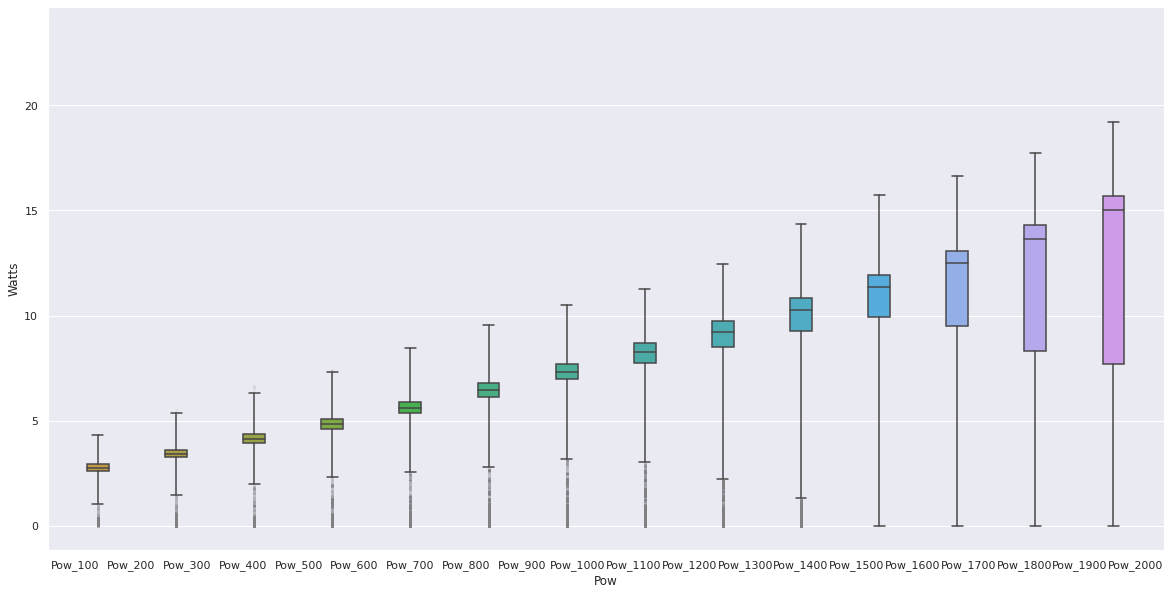

In [10]:
# boxplots of RPM distributions per RPM category
# increasing mean and variance are observable in our data

flierprops = dict(marker='x', markerfacecolor='None', markersize=2,  markeredgecolor='grey', alpha=0.01)
bp = sns.boxplot(x="Pow", y="Watts", hue="Pow", width=8, whis=5, flierprops=flierprops, data=data_hor_cont.melt("time_steps", var_name="Pow", value_name="Watts")) 
bp.legend([],[], frameon=False)


[Text(0, 0.5, 'Range of Power Consumption'),
 Text(0.5, 0, 'Speed'),
 Text(0.5, 1.0, 'Statistical Range of Power Consumption over Speed')]

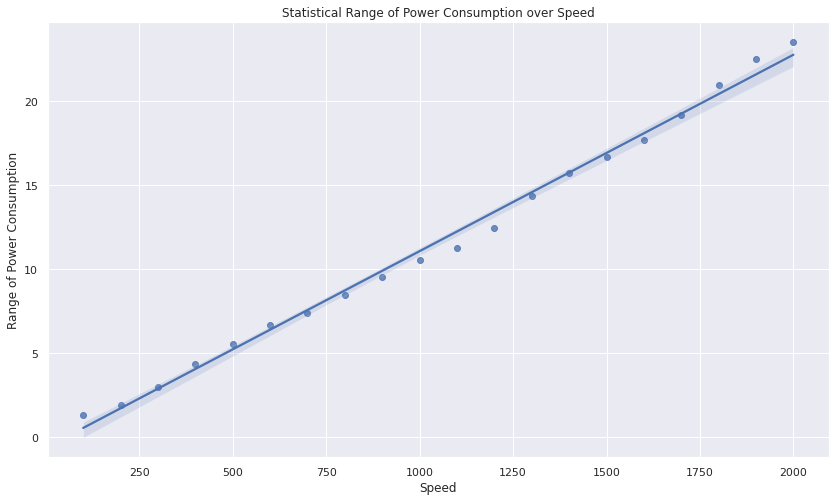

In [11]:
# drop time_steps columns
data_hor_disc.drop(columns=['time_steps'], inplace=True)
data_hor_cont.drop(columns=['time_steps'], inplace=True)


# DESCRIBE WHAT YOU ARE DOING WITH COMMENTS: IT'S THE BASICS
# list of horizontal continuous columns
columns_hor_cont = list(data_hor_cont.columns)
speeds_hor_cont = []
for speed in columns_hor_cont:
  speed = int(speed[4:])
  speeds_hor_cont.append(speed)
# print(speeds_hor_cont)

range_hor_cont = []
for label, content in data_hor_cont.items():
  range_hor_cont.append(abs(content.max() - content.min()))
# print(range_hor_cont)

sns.set(rc={'figure.figsize':(14,8)})
sns.regplot(x=speeds_hor_cont, y=range_hor_cont).set(xlabel="Speed", ylabel="Range of Power Consumption", title="Statistical Range of Power Consumption over Speed")

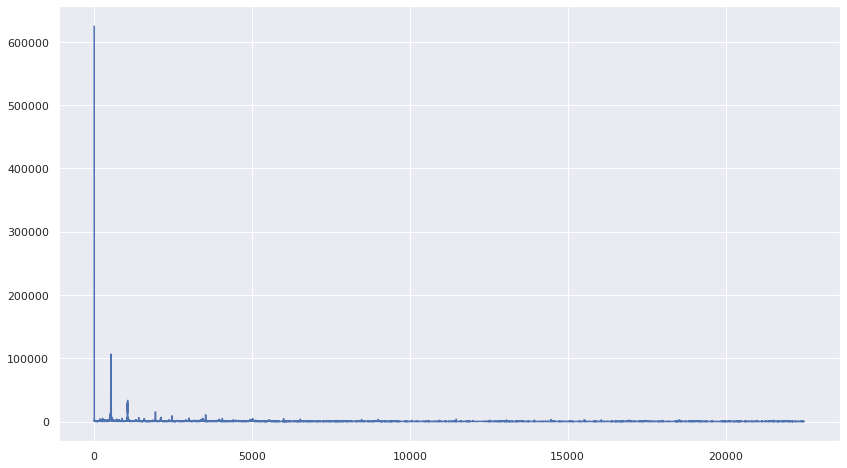

In [32]:
# Perform discrete Fourier transformation
fft = np.fft.fft(data_hor_cont.iloc[:, 19])

# Only take first half, because second half is just mirrored first half
fft_half = np.split(fft, 2)[0]

# Only plot real part, not imaginary part
plt.plot(np.abs(fft_half))

## **data preparation** for LSTM model
---



In [ ]:
### multi-step, multi-input, multi-output
# function that devides model into time windows
'''
def univariate_multioutput_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    # target = target window
    # history_size: size of the past window of information
    # target_size: distance how far in the future the model will predict
    # step = step size

    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data)[:,:,:,np.newaxis,np.newaxis], np.array(labels)[:,:,:,np.newaxis,np.newaxis]

# parameter definition
past_history = 720
future_target = 72
step = 6
train_split = 300000

# train-test split the data
x_train_multi, y_train_multi = univariate_multioutput_data(dataset[:,:2], dataset[:,:2], 0,
                                                 train_split, past_history,
                                                 future_target, step)
x_val_multi, y_val_multi = univariate_multioutput_data(dataset[:,:2], dataset[:, :2],
                                             train_split, None, past_history,
                                             future_target, step)
'''

## LSTM **model fitting**
---



## **evaluation** of model metrics and accuracy on test set
---



In [ ]:
#sample of LSTM evaluation metrics
#model to be implementeds in previous cells
"""
model = Sequential()
model.add(LSTM(32, batch_size=BATCH_SIZE, input_shape=(train_x.shape[1],train_x.shape[2]), return_sequences=True, stateful=False ))#,,return_sequences=Tru# stateful=True 
model.add(Dense(2, activation='softmax'))
opt = tf.keras.optimizers.Adam(lr=0.01, decay=1e-6)

#Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

#Train model
model.fit(
    train_x, train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    shuffle=False,
    validation_data=(validation_x, validation_y)]
)
"""
#evaluate model against test/validation set
#score = model.evaluate(validation_x, validation_y, batch_size=BATCH_SIZE, verbose=0)

#print('Validation accuracy:', score[1])